# Logistic Regression with a Neural Network

### Table of Contents

* [1. Recap : Logistic Regression](#chapter1)
    * [1.1 Formulas](#section_1_1)
    * [1.2  Building the parts of our algorithm](#section_1_2)
        * [1.2.1 Functions of the neural network ](#section_1_2_1)
        * [1.2.2 Merge all functions into a model](#section_1_2_2)
* [2. Example on a simple dataset](#chapter2)
    * [2.1 Loading the dataset](#section_2_1)
    * [2.2 Training our model](#section_2_2)
    * [2.3 Gradient Descent Visualization](#section_2_3)
* [3. Cat Classifier](#chapter3)
    * [3.1 Building Cat Classifier](#section_3_1)
        * [3.1.1 Loading Dataset & Overview](#section_3_1_1)
        * [3.1.1 Functions](#section_3_1_2)
        * [3.1.1 Training and Results](#section_3_1_3)
    * [3.2 POO Neural Network](#section_3_2)
        * [3.2.1 POO model](#section_3_2_1)
        * [3.2.1 Training](#section_3_2_2)

# 1 - Recap : Logistic Regression <a class="anchor" id="chapter1"></a>

The logistic Regression is actually a very simple Neural Network as you can see in the following picture. In this example we have an example of a picture of a cat. The pixels represents the input features. And the algorithm will predict if the picture is a cat or not.

<center><img src="images/02-logistic regression with NN/pixel-image-NN.PNG" width = "600px"></center>

## 1.1 - Formulas <a class="anchor" id="section_1_1"></a>

> m examples with n features by example


$$X=\begin{bmatrix} x^{(1)}_1 & x^{(2)}_1 .. & .. & x^{(m)}_1 \\ x^{(1)}_2 & x^{(2)}_2 .. & .. & x^{(m)}_2 \\. & . & . & .\\. & . & . & . \\ x^{(1)}_n & x^{(2)}_n .. & .. & x^{(m)}_n\end{bmatrix} = \begin{bmatrix}  X^{(1)} &  X^{(2)} & .. & .. &  X^{(m)} \end{bmatrix}  \in  \mathbb{R^{n \times m}}$$  


$$W=\begin{bmatrix} w_1 \\ w_2 \\ .. \\ .. \\ .. \\ w_n \end{bmatrix} \in  \mathbb{R^{n \times 1}}$$  

$$y =\begin{bmatrix} y_1 & y_2 & .. & .. & y_n\end{bmatrix} \in  \mathbb{R^{1 \times m}}$$ 

$$ b \in  \mathbb{R}$$  





> Implementation of the model : 

$$ 
    \begin{cases}
    Z = W^T X + b \\
    A = \sigma (Z) = \frac{1}{1+\exp^{-Z}}
    \end{cases}
$$

> Cost function :

 $$ J = - \frac{1}{m} \sum y \times \log(A) + (1-y) \times \log(1-A)$$

> Gradient Descent :

$$ 
    \begin{cases}
    W = W - \alpha \frac{\partial{J}}{\partial{W}}\\
    b = b - \alpha \frac{\partial{J}}{\partial{b}} \\
    \frac{\partial{J}}{\partial{W}} = \frac{1}{m} X (A-Y)^T\\
    \frac{\partial{J}}{\partial{b}} = \frac{1}{m} \sum (A-Y)
    \end{cases}
$$

## 1.2 - Building the parts of our algorithm <a class="anchor" id="section_1_2"></a>

The main steps for building a Neural Network are:

1. Define the model structure (such as number of input features)
2. Initialize the model's parameters
3. Loop :
    - <b>Forward Propagation</b> - Calculate current loss
    - <b>Backward Propagation</b> - Calculate current gradient
    - <b>Gradient Descent</b> - Update parameters

In [237]:
# Import

import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score

#### 1.2.1 Functions of the neural network <a class="anchor" id="section_1_2_1"></a>

##### Initializing parameters

In [238]:
def initialize(dimension):

    """
    Initializing the parameters W and b to 0

    """

    w = np.zeros((dimension,1))
    b = 0

    return w,b

##### Sigmoid Function

In [239]:
def sigmoid(Z):
    """
    Compute the sigmoid of Z
    """

    sig = 1 / (1+np.exp(-Z))

    return sig


##### Gradient

In [240]:
def gradient(X,y,A,m):

    """
    Compute the gradient 

    X - input
    y - label
    A- Activation / Sigmoid (model)

    """
    
    # Gradient
    dw = (1/m) * np.dot(X,(A-y).T)
    db = (1/m) * np.sum(A-y)

    return dw, db

##### Update Gradient

In [241]:
def update_param(w,b,dw,db, learning_rate = 0.01):
    """
    This function updates the parameters w and b with the gradient
    """

    w = w - learning_rate * dw
    b = b - learning_rate * db

    return w,b

##### Loss function

In [242]:
def cost_func(A,y,m):
    """
    This function computes the loss function 
    """

    cost = -(1/m) * np.sum(y*np.log(A) + (1-y) * np.log(1-A))

    return cost

##### predict

In [243]:
def predict(X,w,b):

    """
    Model prediction

    X - Input
    w,b - parameters
    """

    # compute activation
    Z = np.dot(w.T,X) + b
    A = sigmoid(Z)

    # predict
    A[A>=0.5] = 1
    A[A<0.5] = 0

    return A

#### 1.2.2 Merge all functions into a model <a class="anchor" id="section_1_2_2"></a>

In [244]:
def model(X,y,num_iter = 200, learning_rate = 0.01):

    """
    Builds the logistic Regression model by calling the function we've implemented previously
    
    """ 
    # Loss list
    Loss_train = []

    # Accuracy 
    Acc_train = []

    # Dimension and m  
    dimension = X.shape[0]
    m = X.shape[1]

    # Initialize parameters w and b
    w,b = initialize(dimension)


    # Training
    for i in range(num_iter):

        # -------- Forward Propagation ------------
        # Activation
        Z = np.dot(w.T,X) + b
        A = sigmoid(Z)

        # Cost function
        cost = cost_func(A,y,m)

        # Accuracy
        y_pred = predict(X,w,b)
        acc = accuracy_score(y.T,y_pred.T)
        
        Loss_train.append(cost)
        Acc_train.append(acc)


        #-------- Backward Propagation ------------
        # Gradient
        dw,db = gradient(X,y, A,m)

    
        #-------- Gradient Descent ------------
        # Update Params
        w,b = update_param(w,b,dw,db,learning_rate)


        # Display the training process with the iteration, loss and Accuracy
        if i%50 == 0:
            print(f"Iter {i} : Train_Loss = {cost}, Train_acc = {acc}")

    return {"params":{"w":w,"b":b},"Loss":Loss_train,"Accuracy":Acc_train}


# 2. Example on a simple dataset  <a class="anchor" id="chapter2"></a>

### 2.1 Loading the dataset  <a class="anchor" id="section_2_1"></a>

In [245]:
from sklearn.datasets import make_blobs

In [246]:
X, y = make_blobs(n_samples = 100, n_features = 2, centers = 2, random_state =0)

In [247]:
print("X shape:", X.shape)
print("Y shape:", y.shape)

X shape: (100, 2)
Y shape: (100,)


In [248]:
# Reshape de y 
X = X
y = y.reshape((X.shape[0],1))


print("X shape:",X.shape)
print("Y shape:",y.shape)

X shape: (100, 2)
Y shape: (100, 1)


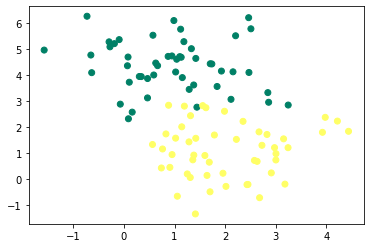

In [249]:
# Visualization of the example

plt.scatter( X[:,0],X[:,1], c=y,cmap="summer")
plt.show()

### 2.2 - Training our model  <a class="anchor" id="section_2_2"></a>

In this example we have :
- X.shape : 100,2 (100 examples, 2 features)
- y.shape : 100,1

So for our model we need to take X.T and y.T 

In [251]:
result = model(X.T,y.T,num_iter = 1000, learning_rate = 0.01)

Iter 0 : Train_Loss = 0.6931471805599453, Train_acc = 0.5
Iter 50 : Train_Loss = 0.5075400099523365, Train_acc = 0.82
Iter 100 : Train_Loss = 0.4300955349899871, Train_acc = 0.85
Iter 150 : Train_Loss = 0.38257886868727115, Train_acc = 0.88
Iter 200 : Train_Loss = 0.3505544747818968, Train_acc = 0.87
Iter 250 : Train_Loss = 0.32765342901883066, Train_acc = 0.87
Iter 300 : Train_Loss = 0.31051019285109177, Train_acc = 0.87
Iter 350 : Train_Loss = 0.29720353473785804, Train_acc = 0.87
Iter 400 : Train_Loss = 0.2865692829768506, Train_acc = 0.87
Iter 450 : Train_Loss = 0.2778657320144529, Train_acc = 0.88
Iter 500 : Train_Loss = 0.27059992358200385, Train_acc = 0.89
Iter 550 : Train_Loss = 0.26443230148776126, Train_acc = 0.89
Iter 600 : Train_Loss = 0.2591217565468766, Train_acc = 0.89
Iter 650 : Train_Loss = 0.25449256542042664, Train_acc = 0.89
Iter 700 : Train_Loss = 0.2504137431402892, Train_acc = 0.89
Iter 750 : Train_Loss = 0.24678571953864814, Train_acc = 0.89
Iter 800 : Train_Los

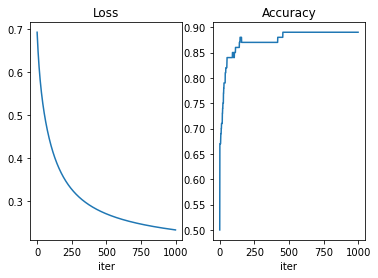

In [252]:
# Display 

fig, ax = plt.subplots(1,2)
ax[0].plot(result['Loss'])
ax[0].set_xlabel("iter")
ax[0].set_title("Loss")

ax[1].plot(result['Accuracy'])
ax[1].set_xlabel("iter")
ax[1].set_title("Accuracy")
plt.show()

#### Different learning Rate

Iter 0 : Train_Loss = 0.6931471805599453, Train_acc = 0.5
Iter 50 : Train_Loss = 0.26968697631947913, Train_acc = 0.89
Iter 100 : Train_Loss = 0.23289154963695535, Train_acc = 0.89
Iter 150 : Train_Loss = 0.2171527365237731, Train_acc = 0.89
Iter 200 : Train_Loss = 0.2072973643126416, Train_acc = 0.9
Iter 250 : Train_Loss = 0.1999546394152538, Train_acc = 0.91
Iter 300 : Train_Loss = 0.19396237555402487, Train_acc = 0.92
Iter 350 : Train_Loss = 0.18881631543131958, Train_acc = 0.92
Iter 400 : Train_Loss = 0.184262405830839, Train_acc = 0.92
Iter 450 : Train_Loss = 0.18015761620706616, Train_acc = 0.92
Iter 0 : Train_Loss = 0.6931471805599453, Train_acc = 0.5
Iter 50 : Train_Loss = 0.5075400099523365, Train_acc = 0.82
Iter 100 : Train_Loss = 0.4300955349899871, Train_acc = 0.85
Iter 150 : Train_Loss = 0.38257886868727115, Train_acc = 0.88
Iter 200 : Train_Loss = 0.3505544747818968, Train_acc = 0.87
Iter 250 : Train_Loss = 0.32765342901883066, Train_acc = 0.87
Iter 300 : Train_Loss = 0.3

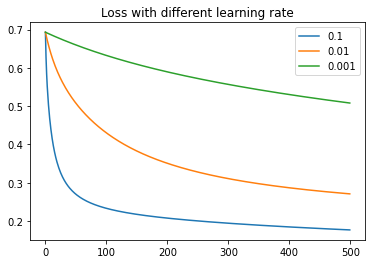

In [253]:
learning_rate = [0.1,0.01,0.001]

plt.figure()

for alpha in learning_rate:
    result = model(X.T,y.T,num_iter = 500, learning_rate = alpha)
    plt.plot(result['Loss'])

plt.title('Loss with different learning rate')
plt.legend(['0.1','0.01','0.001'])


### 2.3 - Gradient Descent Visualization <a class="anchor" id="section_2_3"></a>

In [135]:
# plotly install

#!pip install plotly

In [155]:
# Creat a meshgrid

lim = 10
h = 100
W1 = np.linspace(-lim,lim,h)
W2 = np.linspace(-lim,lim,h)

W11, W22 = np.meshgrid(W1,W2)

W_final = np.c_[W11.ravel(),W22.ravel()].T
W_final.shape

(2, 10000)

In [160]:
# small example 

# initialize and activation
b = 0
Z = X.dot(W_final) + b
A = 1/(1+np.exp(-Z))

# cost 
epsilon = 1e-15
L = (1/len(y)) * np.sum(-y * np.log(A+epsilon) - (1-y)*np.log(1-A+epsilon), axis=0).reshape(W11.shape)
L.shape

(100, 100)

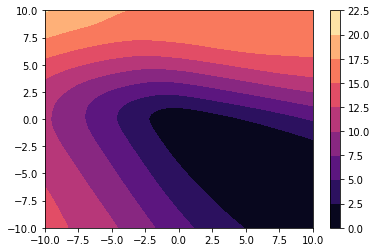

In [229]:
# Display of the cost 

plt.figure(1)
plt.contourf(W11,W22,L,cmap='magma')
plt.colorbar()

In [220]:
# test visualization gradient descent

def model_visualization(X,y,num_iter = 200, learning_rate = 0.01):

    # Loss list
    history = {"w1":[],"w2":[],"Loss":[]}

    # Accuracy 
    Acc_train = []

    dimension = X.shape[0]
    m = X.shape[1]


    # Initialize parameters w and b
    w,b = initialize(dimension)
    
    w[0] = - 7.5
    w[1] = -7.5

    print(w)
    # Optimization
    for i in range(num_iter):

        # Activation
        Z = np.dot(w.T,X) + b
        A = sigmoid(Z)

        # Gradient
        dw,db = gradient(X,y, A,m)

        # Cost function
        cost = cost_func(A,y,m)
        history["Loss"].append(cost)


        # Update Params
        w,b = update_param(w,b,dw,db,learning_rate)

        history["w1"].append(w[0,0])
        history["w2"].append(w[1,0])

    return history


In [226]:
history = model_visualization(X.T,y.T,num_iter = 500, learning_rate = 0.1)

[[-7.5]
 [-7.5]]


In [227]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Surface(x = W11, 
                                 y = W22,
                                 z= L)])

fig.update_layout(template= "plotly_dark", 
                  title='Loss - W11 and W22', 
                  scene = dict(
                    xaxis_title='W11',
                    yaxis_title='W22',
                    zaxis_title='Loss'),
                  width=500, 
                  height=500)     

fig.add_scatter3d(x=history["w1"],
                  y=history["w2"],
                  z = history['Loss'], mode='markers', 
                  marker=dict(size=5, color="red",         
                              colorscale='Reds')) 

fig.show()

# 3. Cat Classifier  <a class="anchor" id="chapter3"></a>

In this section we will build a logistic regression classifier to recognize cats. 

### 3.1 Building Cat Classifier  <a class="anchor" id="section_3_1"></a>

#### 3.1.1 Loading Dataset & Overview  <a class="anchor" id="section_3_1_1"></a>

First, we need to import all the packages that we will need during this example.

In [2]:
# Numpy and pyplot
import numpy as np
import matplotlib.pyplot as plt

# Sklearn metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss

# PIL and scipy : used to test our model with our own picture
from PIL import Image
from scipy import ndimage

# h5py : a package to interact with a dataset that is stored on an H5 file
import h5py

%matplotlib inline

Now we need to load the dataset "01 - cat". This file contains the training set and the test set

In [3]:
dataset_file = "datasets/01 - cat/"

def load_dataset():

    # Training set
    train_dataset = h5py.File(dataset_file + "train_catvnoncat.h5","r")
    X_train = np.array(train_dataset["train_set_x"][:])
    y_train = np.array(train_dataset["train_set_y"][:])

    # Test set
    test_dataset = h5py.File(dataset_file + "test_catvnoncat.h5","r")
    X_test = np.array(test_dataset["test_set_x"][:])
    y_test = np.array(test_dataset["test_set_y"][:])

    # classes
    classes = np.array(test_dataset["list_classes"][:])

    return X_train, y_train, X_test, y_test, classes

#### Loading the dataset

In [4]:
X_train, y_train, X_test, y_test, classes = load_dataset()

# Display Shape
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:",y_test.shape)
print("classes shape:",classes.shape)


X_train shape: (209, 64, 64, 3)
X_test shape: (50, 64, 64, 3)
y_train shape: (209,)
y_test shape: (50,)
classes shape: (2,)


In [5]:
# We need to reshape y_train and y_test

y_train = y_train.reshape((1,y_train.shape[0]))
y_test = y_test.reshape((1,y_test.shape[0]))

print("y_train shape:", y_train.shape)
print("y_test shape:",y_test.shape)


y_train shape: (1, 209)
y_test shape: (1, 50)


#### overview

In [6]:
# Data distribution

print("Data distribution in the training set:",np.unique(y_train,return_counts=True))
print("Data distribution in the test set:",np.unique(y_test,return_counts=True))

Data distribution in the training set: (array([0, 1], dtype=int64), array([137,  72], dtype=int64))
Data distribution in the test set: (array([0, 1], dtype=int64), array([17, 33], dtype=int64))


As we can see, the data are nbt distributed in a balanced way. In order to have a better model we should have a balanced distribution in the training and testing dataset. But for this example we will keep the dataset as it is.

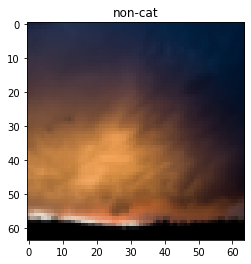

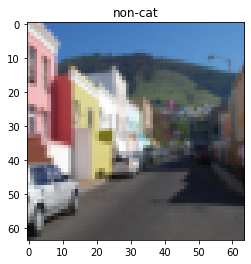

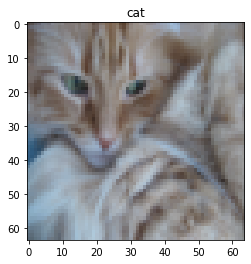

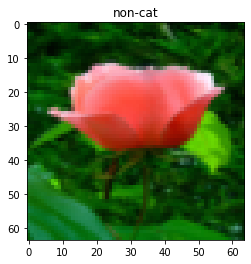

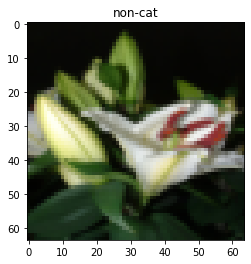

In [7]:
# Display the first images of the training set

for i in range(5):
    plt.figure()
    plt.imshow(X_train[i])

    # label 
    title_image = y_train[0,i]
    plt.title(classes[title_image].decode("utf-8"))

##### Flatten

<center><img src="images/02-logistic regression with NN/pixel-image.PNG" width = "600px"></center>

The inputs are images with the following shape : (num_px,num_px,3).
In order to train our model we need to flatten our inputs into one vector. Therefor we should reshape images of shape (num_px, num_px, 3) in a numpy-array of shape (num_px $*$ num_px $*$ 3, 1).

 After this, our training (and test) dataset is a numpy-array where each column represents a flattened image.

A trick when you want to flatten a matrix X of shape (a,b,c,d) to a matrix X_flatten of shape (b$*$c$*$d, a) is to use: 

X_flatten = X.reshape(X.shape[0], -1).T 

In [8]:
X_train_flatten = X_train.reshape(X_train.shape[0],-1).T
X_test_flatten = X_test.reshape(X_test.shape[0],-1).T


print("X_train flatten shape:",X_train_flatten.shape)
print("X_test flatten shape:",X_test_flatten.shape)

X_train flatten shape: (12288, 209)
X_test flatten shape: (12288, 50)


#### 3.1.2 Functions  <a class="anchor" id="section_3_1_2"></a>


<center><img src="images/02-logistic regression with NN/graph_model.PNG" width = "300px"></center>

In this section we will build all the functions our model needs to classify the images.

In [9]:
def initialize_parameters(dim):
    """
    This function creates a vector of zeros of shape (dim, 1) for w and initializes b to 0.
    --
    Inputs:
    - dim : number of features in the input elem

    Returns:
    w -- initialized vector of shape (dim, 1)
    b -- initialized scalar (corresponds to the bias) of type float
    """
    W = np.zeros((dim,1))
    b = 0

    return W,b

In [10]:
def sigmoid(Z):
    """
    Sigmoid function 1/(1+exp(-Z))
    --
    Inputs:
    - Z : z = w.T X + b
    
    Return:
    s -- sigmoid(z)
    """

    activation = 1 / (1+np.exp(-Z))

    return activation

In [11]:
def cost_func(A,y):
    """
    Compute the log_loss 
    --
    Inputs: 
    - A :  activation / sigmoid result
    - Y : true "label" vector (containing 0 if non-cat, 1 if cat) of size (1, number of examples)

    Return:
    cost -- negative log-likelihood cost for logistic regression
    """
    # number of examples
    m = y.shape[1]

    # log loss
    LogLoss = (-1/m) * np.sum(y*np.log(A) + (1-y)*np.log(1-A))

    return LogLoss

In [12]:
def gradient(A,X, y):
    """
    Compute the gradient dw and db

    Inputs: 
    - A : activation / sigmoid result
    - Y : true "label" vector (containing 0 if non-cat, 1 if cat), of shape (1, number of examples)

    Returns:
    dw - the gradient of the weights 
    db - the gradient of  bias 
    """

    m = y.shape[1]

    # dw
    dw = (1/m) * np.dot(X,(A-y).T)

    #db
    db = (1/m) * np.sum(A-y)

    return dw,db

In [13]:
def update_params(W,b,dw,db,learning_rate):

    """"
    Update the parameters
    --
    Inputs:
    - W :  weights
    - b : biais
    - dw : gradient of weights
    - db : gradient of bias
    - learning_rate

    Outputs:
    W, b
    
    """

    W = W  - learning_rate * dw
    b = b - learning_rate * db

    return W,b

In [14]:
def predict(X,W,b):

    """
    Predict whether the label is 0 or 1 using learned logistic regression parameters (w, b)
    
    Arguments:
    - W : weights, a numpy array of size (num_px * num_px * 3, 1)
    - b : bias, a scalar
    - X : data of size (num_px * num_px * 3, number of examples)
    
    Returns:
    - A : a numpy array (vector) containing all predictions (0/1) for the examples in X
    """

    # Activation
    Z = np.dot(W.T,X) + b
    A = sigmoid(Z)

    # Predict
    A[A>=0.5] = 1
    A[A<0.5] = 0

    return A


##### Model

In [15]:
def model(X_train,y_train,X_test,y_test, num_iter = 200, learning_rate = 0.01):
    """
    Update the parameters
    --
    Inputs:
    - X_train : training set represented by a numpy array of shape (num_px * num_px * 3, m_train)
    - Y_train :  training labels represented by a numpy array (vector) of shape (1, m_train)
    - X_test :  test set represented by a numpy array of shape (num_px * num_px * 3, m_test)
    - Y_test  : test labels represented by a numpy array (vector) of shape (1, m_test)
    - num_iterations : hyperparameter representing the number of iterations to optimize the parameters
    - learning_rate : hyperparameter representing the learning rate used in the update rule of optimize()

    Output:

    - dico_res : dictionary containing information about the model.

    """

    dim = X_train.shape[0]

    # Loss & Acc
    Loss_train = []
    Loss_test = []
    Acc_train = []
    Acc_test = []

    # initialize
    W,b = initialize_parameters(dim)


    for i in range(num_iter):

        # ----- Forward Propagation ------
        
        # Activation
        Z_train = np.dot(W.T,X_train) + b
        A_train = sigmoid(Z_train)

        Z_test = np.dot(W.T,X_test) + b
        A_test = sigmoid(Z_test)

        # cost : we use the metrics log_loss from scikit learn
        cost_train = log_loss(y_train.T,A_train.T,eps=1e-15)
        cost_test = log_loss(y_test.T, A_test.T, eps = 1e-15)

        # prediction
        y_pred_train = predict(X_train, W,b)
        y_pred_test = predict(X_test,W,b)

        # acc : scikit learn accuracy_score
        acc_train = accuracy_score(y_train.T,y_pred_train.T)
        acc_test = accuracy_score(y_test.T,y_pred_test.T)

        # add info
        Loss_train.append(cost_train)
        Acc_train.append(acc_train)
        Loss_test.append(cost_test)
        Acc_test.append(acc_test)

        # ----- Backward Propagation -----

        # gradient
        dw, db = gradient(A_train,X_train,y_train)

        # ------ Gradient Descent --------

        W,b = update_params(W,b,dw,db,learning_rate)

    
    dico_res = {"params":{"W":W,"b":b}, "Loss_train": Loss_train, "Acc_train":Acc_train, "Loss_test": Loss_test, "Acc_test":Acc_test}

    return dico_res

#### 3.1.3 Training and Results <a class="anchor" id="section_3_1_3"></a>

##### Normalization

Another common technique we use in Machine Learning and Deep Learning is to normalize our data. It often leads to a better performance because gradient descent converges faster after normalization.

Min Max Normalization: 

$$X = \frac{X - X_{min}}{X_{max} - X_{
    min}}$$

> In our case the pixel value is between 0 and 255

In [16]:
X_train_flatten_norm = X_train_flatten/np.max(X_train_flatten)

# Warning: the data are normalized with the Training set
X_test_flatten_norm = X_test_flatten/np.max(X_train_flatten)

In [29]:
dico_training = model(X_train_flatten_norm,y_train,X_test_flatten_norm,y_test, num_iter = 3000, learning_rate = 0.001)

Text(0.5, 1.0, 'Loss | alpha = 0.001')

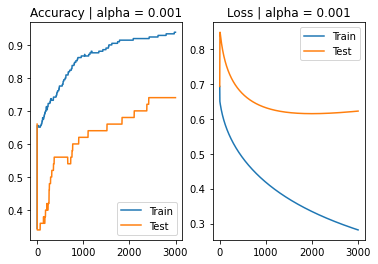

In [33]:
fig,ax = plt.subplots(1,2)

ax[0].plot(dico_training["Acc_train"])
ax[0].plot(dico_training["Acc_test"])
ax[0].legend(['Train','Test'])
ax[0].set_title("Accuracy | alpha = 0.001")

ax[1].plot(dico_training["Loss_train"])
ax[1].plot(dico_training["Loss_test"])
ax[1].legend(['Train','Test'])
ax[1].set_title("Loss | alpha = 0.001")

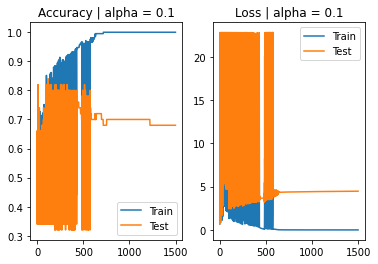

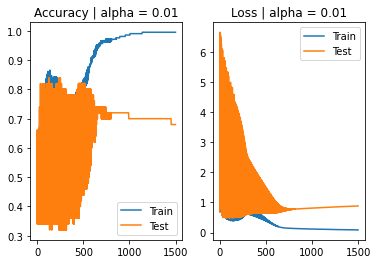

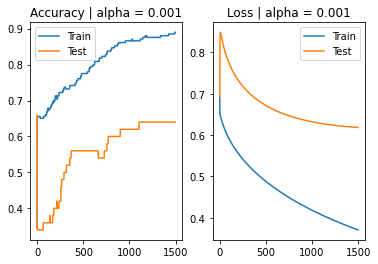

In [36]:
learning_rates = [0.1,0.01,0.001]

for i in learning_rates:
    
    dico_training = model(X_train_flatten_norm,y_train,X_test_flatten_norm,y_test, num_iter = 1500, learning_rate = i)

    fig,ax = plt.subplots(1,2)

    ax[0].plot(dico_training["Acc_train"])
    ax[0].plot(dico_training["Acc_test"])
    ax[0].legend(['Train','Test'])
    ax[0].set_title(f"Accuracy | alpha = {i}")

    ax[1].plot(dico_training["Loss_train"])
    ax[1].plot(dico_training["Loss_test"])
    ax[1].legend(['Train','Test'])
    ax[1].set_title(f"Loss | alpha = {i}")

Interpretation:

You can see the cost decreasing and the accuracy increasing. It shows that the parameters are being learned. However, you see that you could train the model even more on the training set. The training set accuracy goes up, but the test set accuracy goes down There is a large gap between the training set accuracy and the testing set accuracy.<b>This is called overfitting</b>

##### predict

In [37]:
# Training
dico_training = model(X_train_flatten_norm,y_train,X_test_flatten_norm,y_test, num_iter = 3000, learning_rate = 0.001)

# W and b after training
params = dico_training["params"]

W = params["W"]
b = params["b"]

Text(0.5, 1.0, 'y_pred=non-cat | y_true=0')

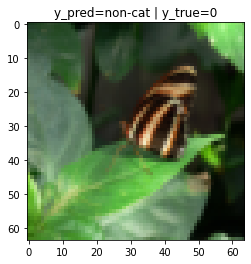

In [80]:
index = 5
num_px = X_test.shape[1]
y_true = y_test[0,index]
y_pred = predict(X_test[index].reshape((num_px*num_px*3,1)),W,b)

plt.figure()
plt.imshow(X_test[index])
plt.title("y_pred=" + str(classes[int(y_pred[0,0])].decode("utf-8")) + " | " +"y_true=" + str(y_true))




### 3.2 POO Neural Network   <a class="anchor" id="section_3_2"></a>

#### 3.2.1 POO model  <a class="anchor" id="section_3_2_1"></a>

#### 3.2.2 Training and results <a class="anchor" id="section_3_2_2"></a>